In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
from sklearn.preprocessing import StandardScaler

# **Loading the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/parkinsons.data')

# **Exploring the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.keys()

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# using this we get to know about the number of rows and columns present in the dataset
df.shape

(195, 24)

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# **Checking for null values**

In [ ]:
df.isnull()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# **Exploratory Data Analysis**

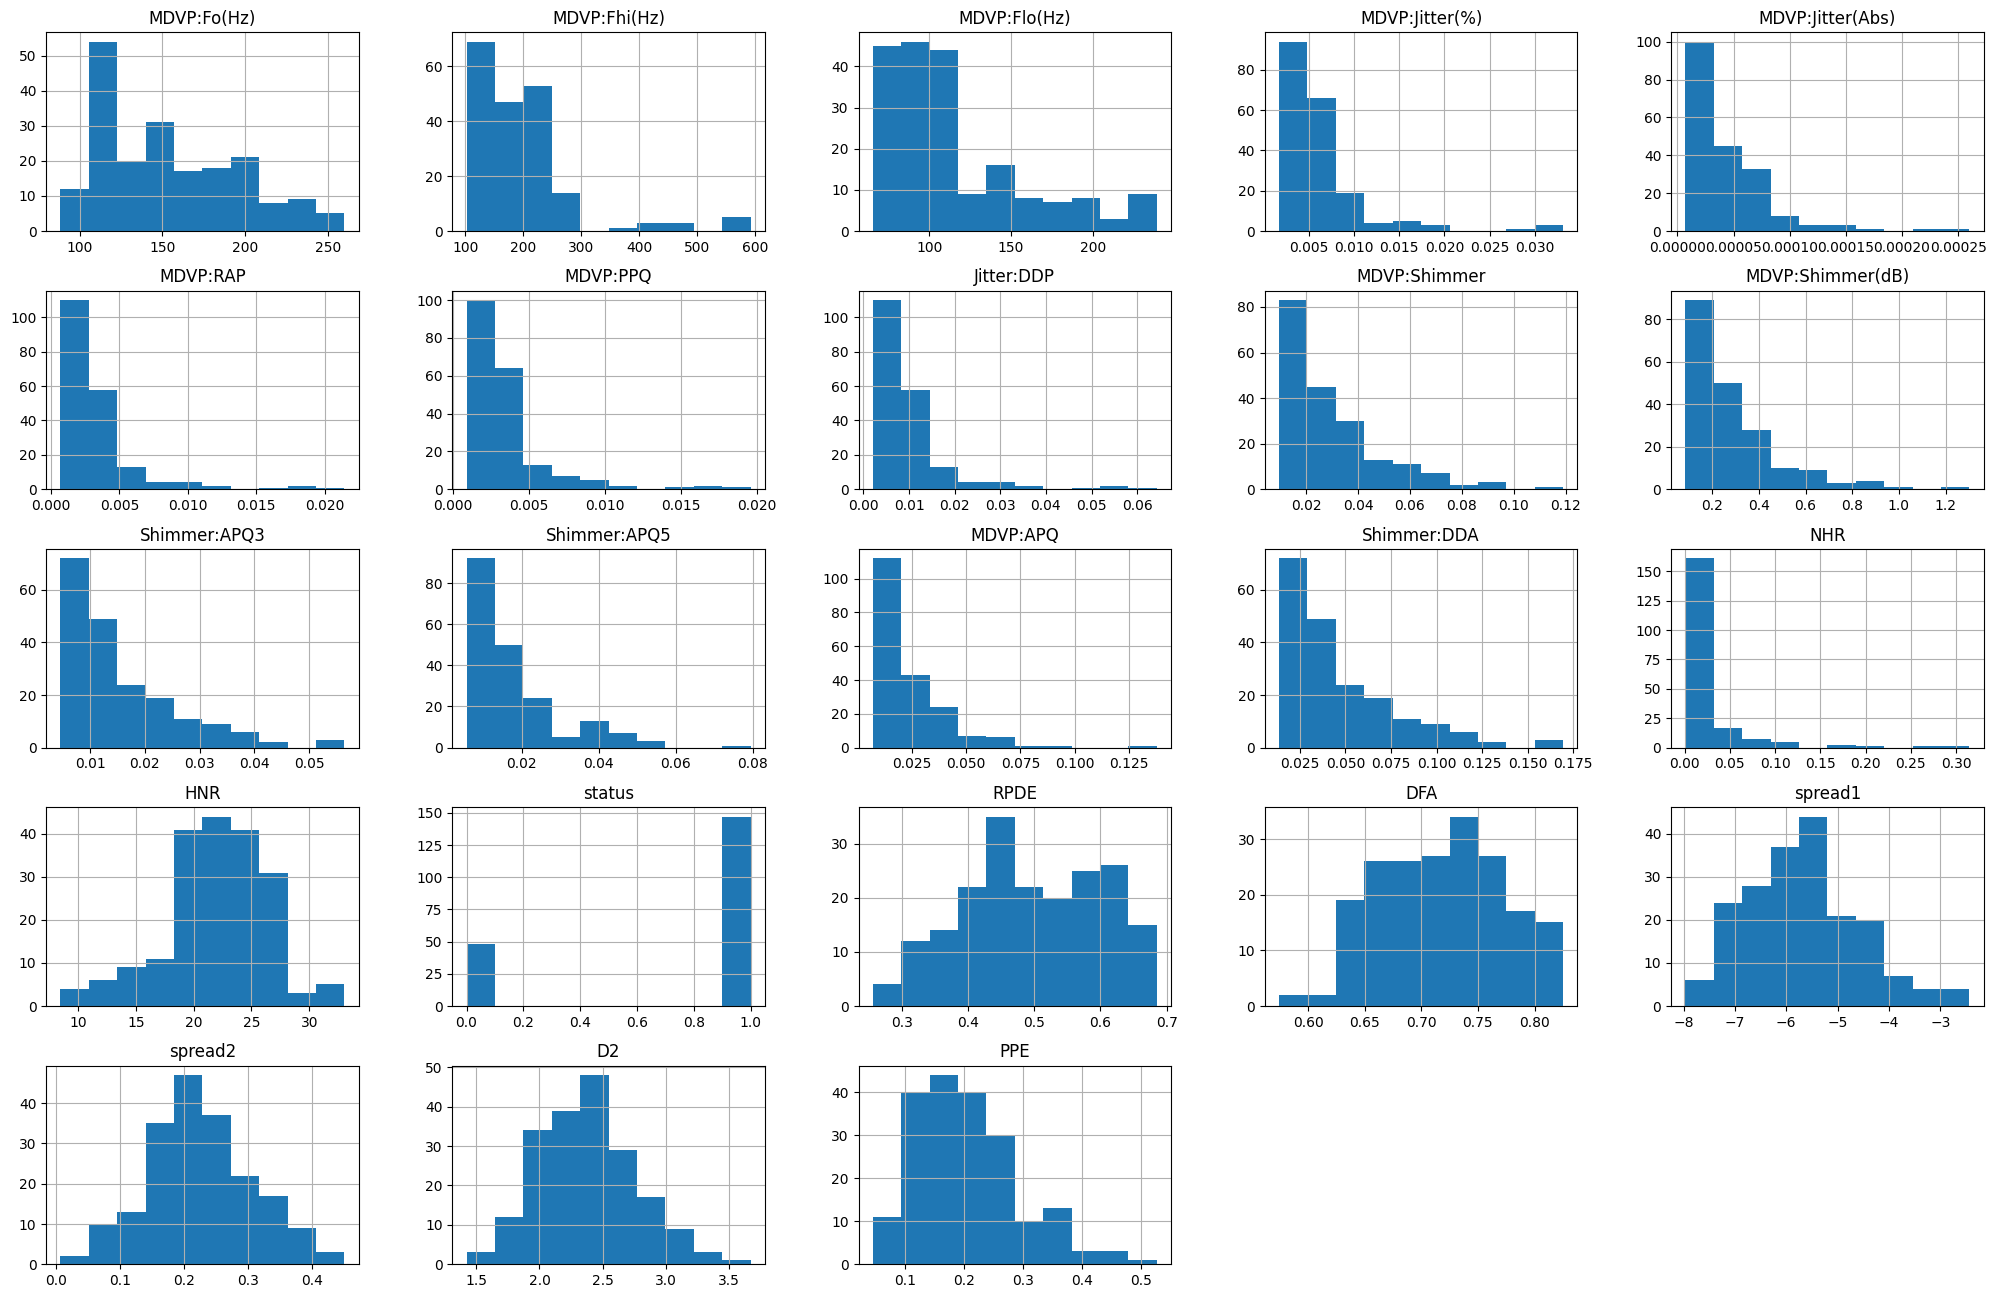

In [ ]:
# Plotting the histogram of dataset

df.hist(figsize=(25,16))
plt.show()

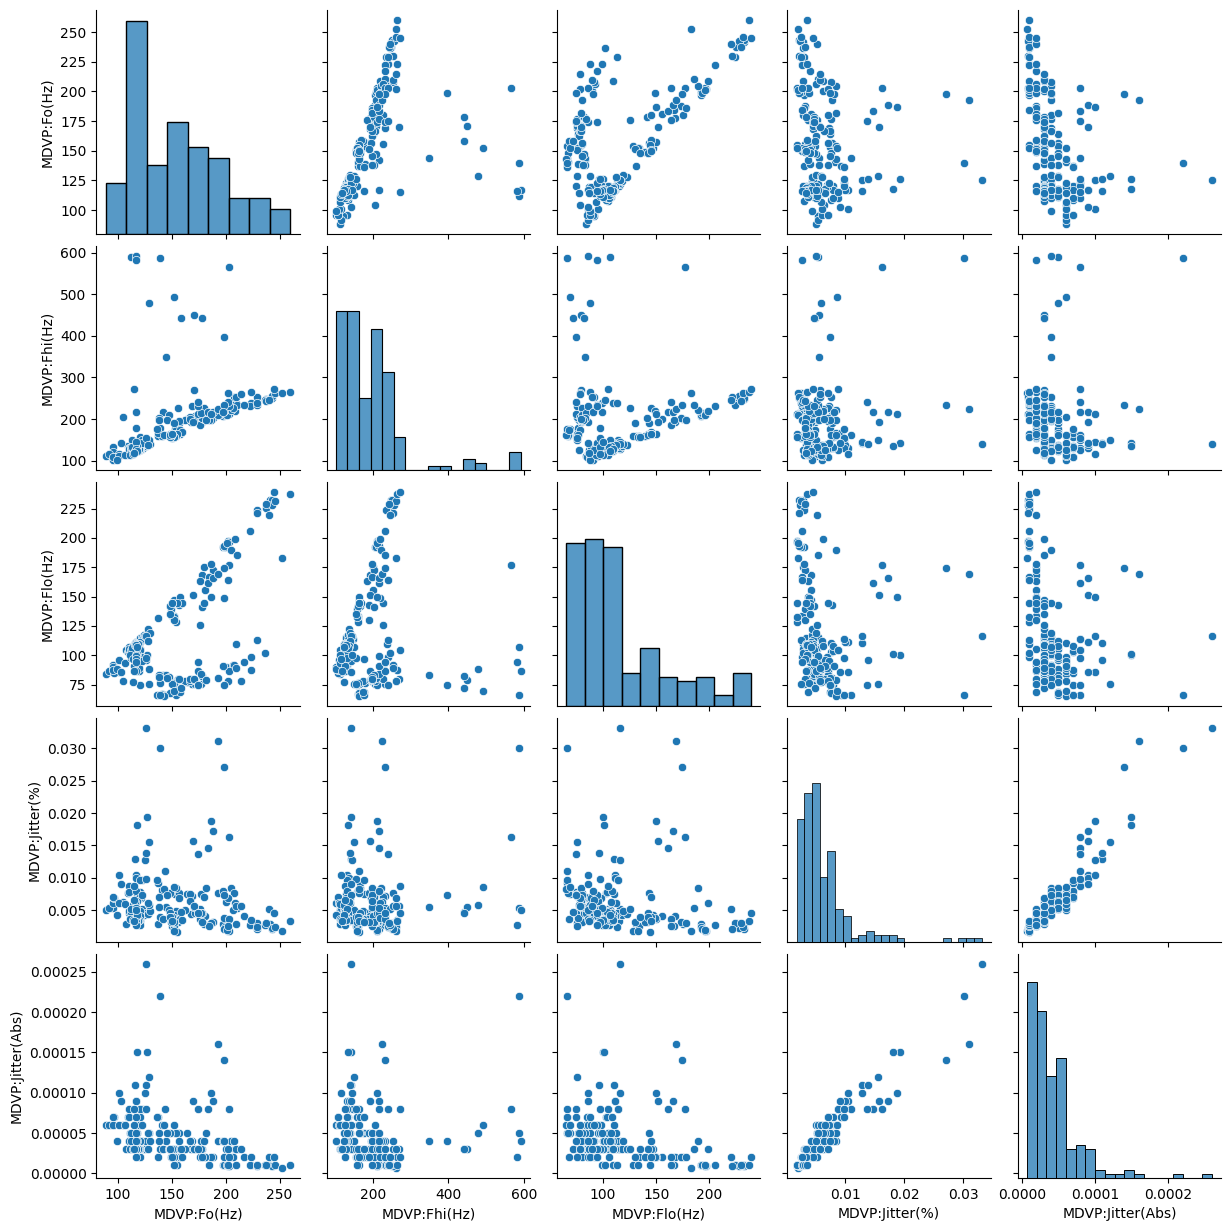

In [ ]:
# Plotting pairplot using Seaborn

sns.pairplot(df.iloc[: ,0:6])
plt.show()

In [ ]:
# Now we will find correlation and plot it using heatmap
df.corr()

<ipython-input-211-fe5e43199262>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<ipython-input-212-2fd8d9b565df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['status'][:-1].sort_values().plot(kind='bar')


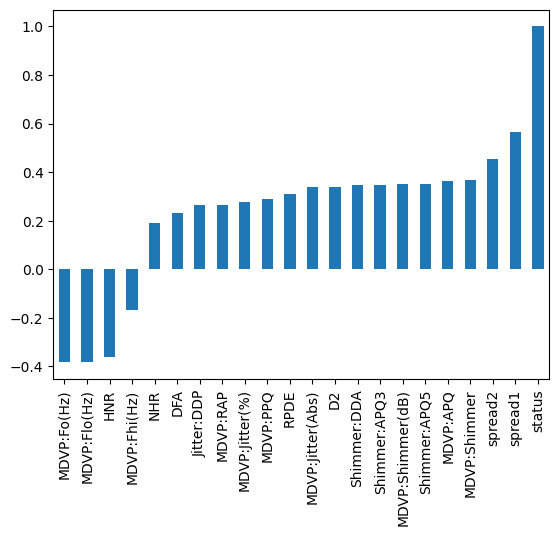

In [ ]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')
plt.show()

<ipython-input-213-4a2f754fff0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt= '.2f')


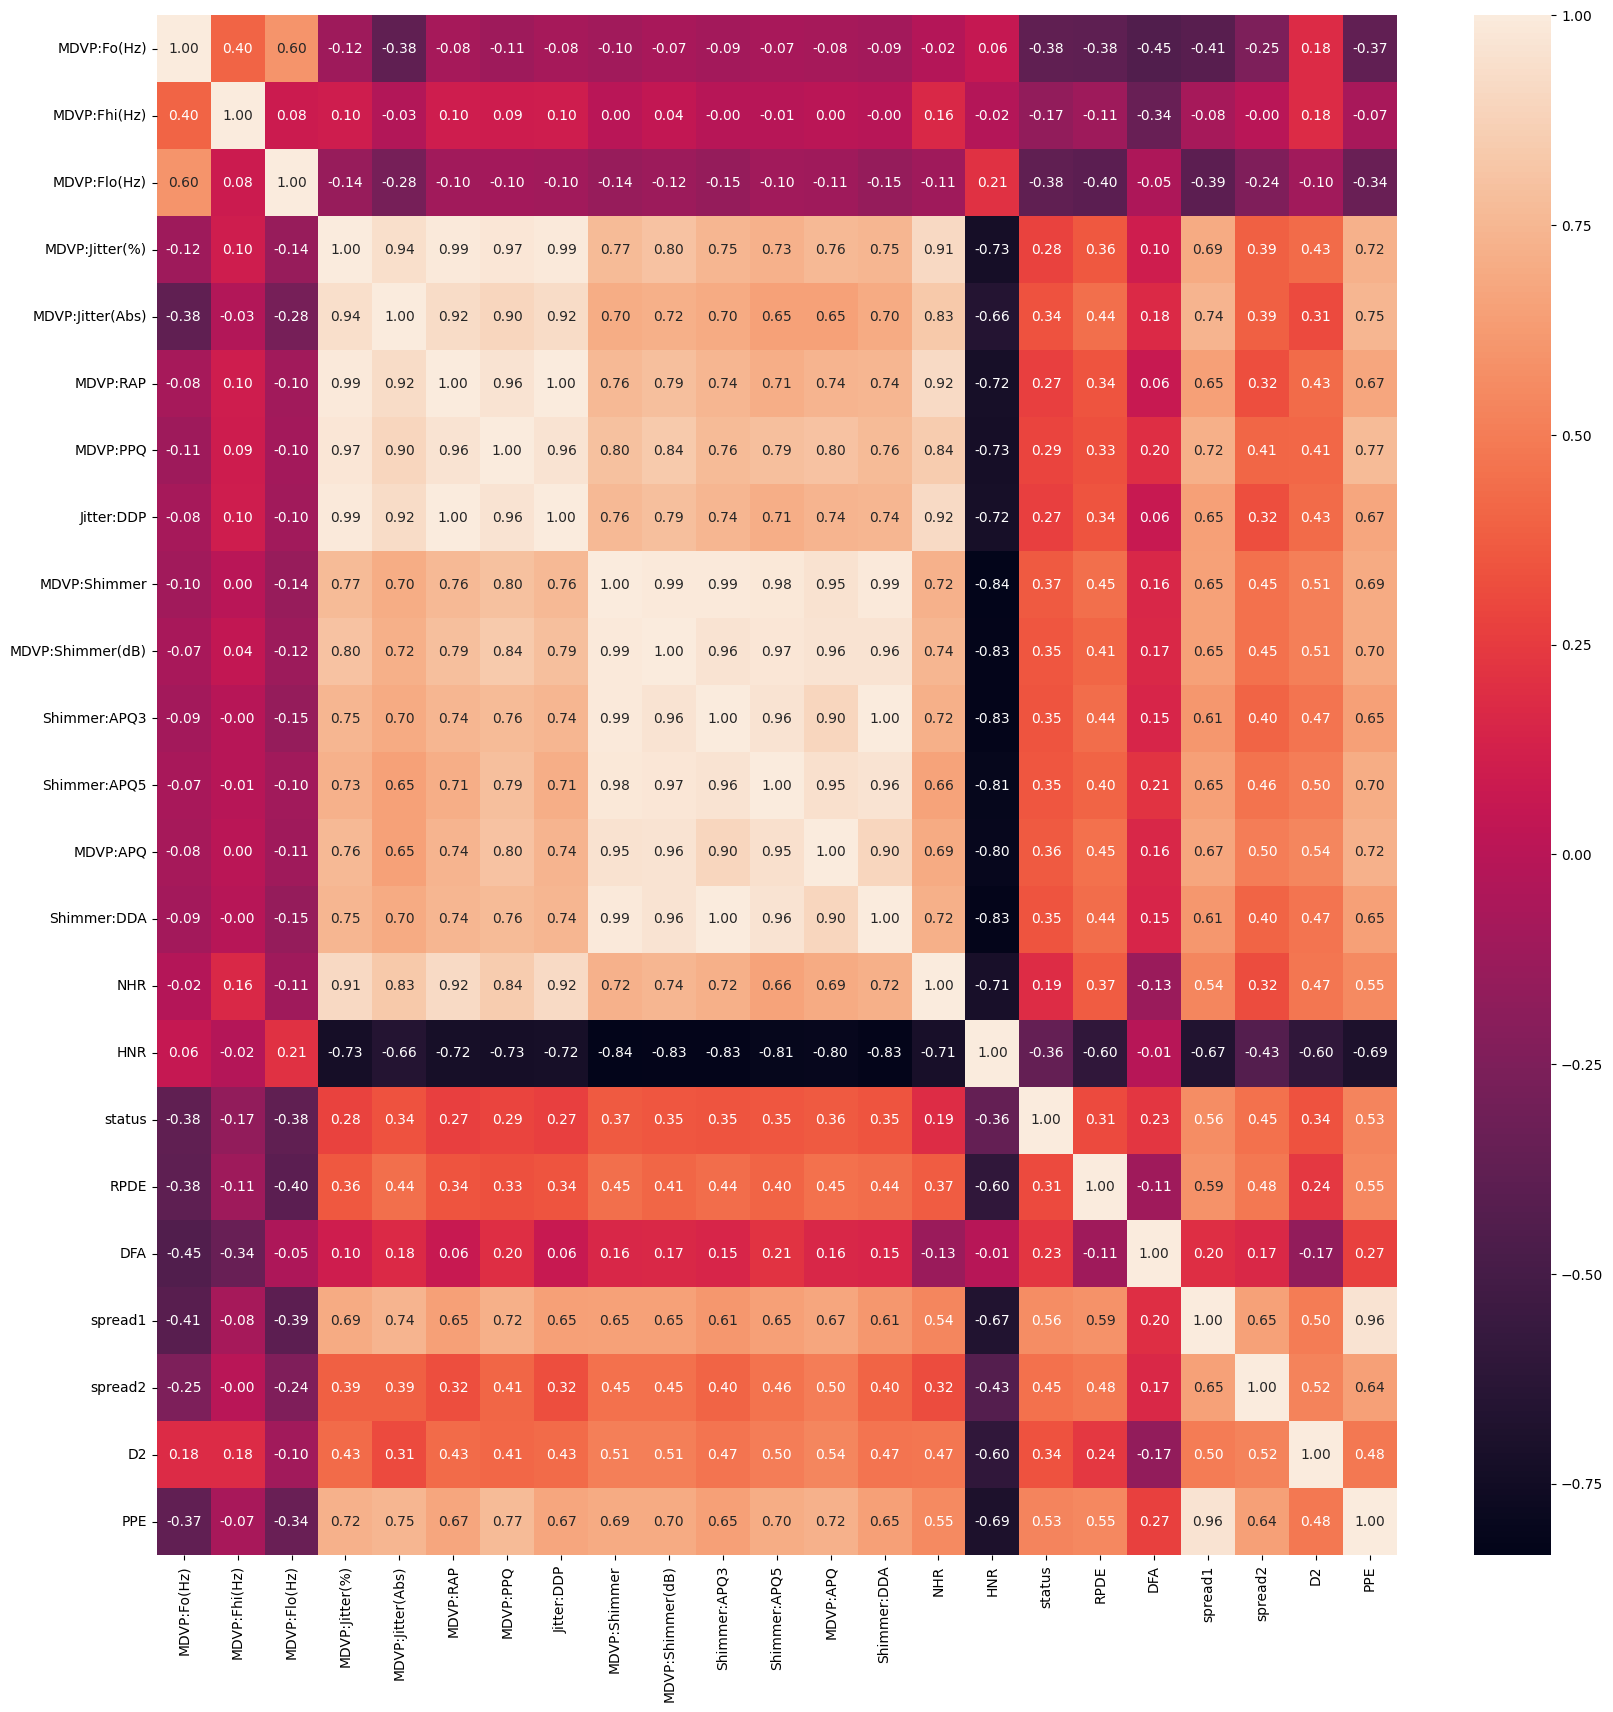

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')
plt.show()

# **Data PreProcessing**

In [ ]:
X = df.drop(columns=['status','name'], axis=1) # Note : dropping column axis = 1; dropping row then axis = 0
Y = df['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [ ]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

The ‘status’ column has values 0 and 1 as labels; let’s get the counts of these labels for both- 0 and 1.

In [ ]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


# **Splitting the Dataset**

**test size 75-25**

***1. random state = 0***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (146, 22) (49, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.8367346938775511


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9183673469387755


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.6530612244897959


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.9387755102040817


In [ ]:
# XGBoost Classifier (XGBC)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

0.9591836734693877


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.92      0.87      0.89        38

    accuracy                           0.84        49
   macro avg       0.77      0.80      0.78        49
weighted avg       0.85      0.84      0.84        49

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.95      0.95      0.95        38

    accuracy                           0.92        49
   macro avg       0.88      0.88      0.88        49
weighted avg       0.92      0.92      0.92        49

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.39      1.00      0.56        11
           1       1.00      0.55      0.71       

***2. random state = 10***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=10)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (146, 22) (49, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.9183673469387755


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9183673469387755


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.7551020408163265


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.8775510204081632


In [ ]:
# XGBoost Classifier (XGBC)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

0.9387755102040817


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.92      0.97      0.95        36

    accuracy                           0.92        49
   macro avg       0.92      0.87      0.89        49
weighted avg       0.92      0.92      0.92        49

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.92      0.97      0.95        36

    accuracy                           0.92        49
   macro avg       0.92      0.87      0.89        49
weighted avg       0.92      0.92      0.92        49

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.52      1.00      0.68        13
           1       1.00      0.67      0.80       

**3. random state = 47**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=47)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (146, 22) (49, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.8775510204081632


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9183673469387755


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.6938775510204082


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.8979591836734694


In [ ]:
# XGBoost Classifier (XGBC)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

0.9387755102040817


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.92      0.92      0.92        38

    accuracy                           0.88        49
   macro avg       0.82      0.82      0.82        49
weighted avg       0.88      0.88      0.88        49

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.90      1.00      0.95        38

    accuracy                           0.92        49
   macro avg       0.95      0.82      0.86        49
weighted avg       0.93      0.92      0.91        49

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.41      0.82      0.55        11
           1       0.93      0.66      0.77       

**test size : 80-20**

***1. random state = 0***











In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.7948717948717948


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9230769230769231


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.6923076923076923


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.9230769230769231


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

0.9487179487179487


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       1.00      0.59      0.74       

***2. random state = 10***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=10)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.9743589743589743


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9743589743589743


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.7435897435897436


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.9487179487179487


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

1.0


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        28

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.52      1.00      0.69        11
           1       1.00      0.64      0.78       

***3. random state = 47***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=47)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.9487179487179487


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9743589743589743


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.7435897435897436


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.9487179487179487


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

0.9743589743589743


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.97      0.97      0.97        31

    accuracy                           0.95        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.95      0.95      0.95        39

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.97      1.00      0.98        31

    accuracy                           0.97        39
   macro avg       0.98      0.94      0.96        39
weighted avg       0.98      0.97      0.97        39

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81       

**test size : 85-15**

***1. random state = 0***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (165, 22) (30, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.7333333333333333


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.7


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.9


In [ ]:
# XGBoost Classifier (XGBC)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

0.9333333333333333


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.83      0.75      0.79        20

    accuracy                           0.73        30
   macro avg       0.71      0.72      0.71        30
weighted avg       0.75      0.73      0.74        30

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.95      0.90      0.92        20

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.55      0.71       

***2. random state = 10***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=10)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (165, 22) (30, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.9666666666666667


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9333333333333333


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.7666666666666667


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.9333333333333333


In [ ]:
# XGBoost Classifier (XGBC)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

1.0


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.96      0.98        23

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.96      0.96      0.96        23

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         7
           1       1.00      0.70      0.82       

***3. random state = 47***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=47)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (165, 22) (30, 22)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
LR_acc = accuracy_score(LR_pred,y_test)

In [ ]:
LR_cr = classification_report(y_test,LR_pred)

In [ ]:
print(LR_acc)

0.9333333333333333


In [ ]:
# Random Forest Classifier (RFC)
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)
rf_acc = accuracy_score(RF_prediction,y_test)

In [ ]:
rf_cr = classification_report(y_test, RF_prediction)

In [ ]:
print(rf_acc)

0.9666666666666667


In [ ]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
NB_acc = accuracy_score(NB_pred,y_test)

In [ ]:
NB_cr = classification_report(y_test, NB_pred)

In [ ]:
print(NB_acc)

0.7333333333333333


In [ ]:
# Support Vector Classifier (SVC)
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [ ]:
svm_cr = classification_report(y_test, svm_prediction)

In [ ]:
print(svm_acc)

0.9333333333333333


In [ ]:
# XGBoost Classifier (XGBC)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [ ]:
xgbc_cr = classification_report(y_test, xgb_prediction)

In [ ]:
print(xgbc_acc)

0.9666666666666667


In [ ]:
print("Logistic Regression Classification Report:\n----------------------\n", LR_cr)
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("Naive Bayes Classification Report:\n----------------------\n", NB_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Logistic Regression Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.96      0.96      0.96        24

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.96      1.00      0.98        24

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.97        30

Naive Bayes Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.42      0.83      0.56         6
           1       0.94      0.71      0.81       

In [ ]:
input_data=(244.99000,272.21000,239.17000,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.18100,0.01084,0.01121,0.01255,0.03253,0.01049,21.52800,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220)
## changing input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

## reshape the numpy array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

## standarize the data or reshape the data
std_data= scaler.transform(input_data_reshaped)

prediction= xgb.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print("Person doesnot have parkinson disease")
else:
    print("Person has parkinson disease")

[0]
Person doesnot have parkinson disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
